In [48]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
%matplotlib inline
from matplotlib import pyplot as plt
# %matplotlib notebook
# %matplotlib inline


In [49]:
# Definir nuestro sistema.
f=5.

A = np.array([1], dtype=float) #"Matriz" de transicion de estado.
B = np.array([0], dtype=float) #"Matriz" de control.
H = np.array([f], dtype=float) #"Matriz" de medición.
P = np.array([10], dtype=float) #"Matriz" de incertidumbre del estado.
Q = np.array([1e-6], dtype=float) #"Matriz" de incertidumbre de la predicción.
R = np.array([1.e-4], dtype=float) #"Matriz" de incertidumbre de la medición.

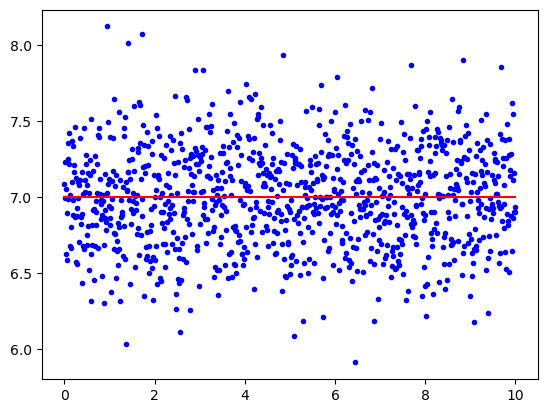

In [51]:
#Generar datos aleatorios.

#El valor que medimos.
valor = 7

#Vamos a generar mediciones.

# Número de mediciones
N = 1000

t = np.linspace(0,10, N)

V = valor * np.ones(t.shape)
#V = valor * np.sin(2*np.pi*t)

#Ruido Gaussiano de la medicion
noise = rnd.randn(N) * np.sqrt(1e-1)

Vn = V + noise

# Graficamos
plt.figure(1)
plt.plot(t, Vn, 'b.', t, V, 'r')
plt.show()

In [52]:
# $\hat{x}_{k-1}$ => xhat_k0
# $\hat{x}_{k}$ => xhat_k1
# $\bar{x}_{k}$ => xbar_k1

def KalmanFilter (Xhat_k0, Phat_k0, U_k1, Z_k, A, B, H, Q, R):
    #Predicción
    Xbar_k1 = np.dot(A, Xhat_k0) + np.dot(B, U_k1)
    Pbar_k1 = np.dot(A, np.dot(Phat_k0, A.transpose()))+Q
    
    #Actualización
    
    #Calculamos la ganancia.
    denom = np.dot(np.dot(H, Pbar_k1), H.transpose())+R
    if len(denom) > 1:
        denom = la.inv(denom)
    else:
        denom = 1. / denom
    Kgain = np.dot(np.dot(Pbar_k1, H.transpose()),denom)
    
    # Actualizamos el Estado y su incertidumbre.
    Xhat_k1 = Xbar_k1 + np.dot(Kgain, (Z_k- np.dot(H, Xbar_k1)))
    Phat_k1 = np.dot(np.eye(len(Xhat_k0))-np.dot(Kgain,H), Pbar_k1)
    
    return Xhat_k1, Phat_k1

In [53]:
#definimos un valor inicial y su incertidumbre estimada (Mat. Cov).

x = (valor + rnd.randn(1)*np.sqrt(Q[0])) / H

P = np.array([0.1], dtype=float)

#Definimos matrices para almacenar la evolucion del sistema.
Xhat=np.zeros((N, 1))
Phat=np.zeros((N, 1))

#Inicializamos valor 0 de la estimacion del estado y su incertidumbre (Mat. Cov)
Xhat[0,0], Phat[0,0] = x, P

#Esta Matriz almacenará el estado calculado por medios convencionales (el promedio)
xSim = np.zeros(t.shape)
xSim[0] = x

for idx in range(1,N):
    Z = Vn[idx] #Obtenemos una medicion.
    
    #Claculamos el promedio del estado a partir de las mediciones que tenemos.
    xSim[idx] = np.mean(Vn[:idx])/H
    
    Xhat[idx,0], Phat[idx,0] = KalmanFilter (Xhat[idx-1], Phat[idx-1], 0, Z, A, B, H, Q, R)

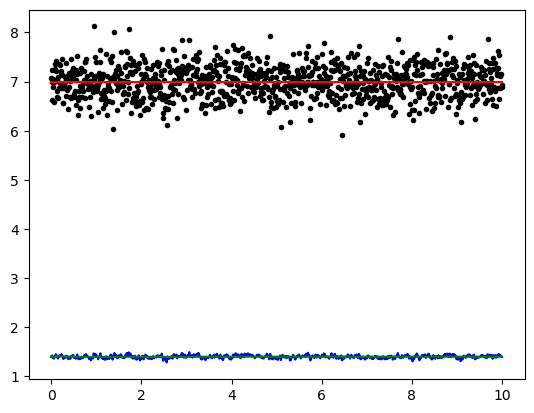

In [54]:

plt.figure(2)
plt.plot(t, Vn, 'k.', t, V, 'r', t, Xhat, 'b', t, xSim, 'g')




In [25]:
plt.figure(3)
plt.plot(t, Phat)

<IPython.core.display.Javascript object>